In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/funny/Downloads/ASTR19_S22_group_project_data.txt'
# parsing the data from the file
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Function to parse the tidal data from the file
def parse_tidal_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):
                day, time, height = line.split()
                day = int(day)
                hour, minute = map(int, time.split(':'))
                total_minutes = day + (hour * 60 + minute) / (24 * 60)
                height = float(height)
                data.append([total_minutes, height])
    return data


def tidal_function(t, A, O1, O2, phase_1, phase_2, B):
    return A * np.sin(O1 * t + phase_1) +B*np.sin(O2 * t+ phase_2)
# this is the result of two sin functions combined, one for the 12 hour cycle, and one for the 24 hour cycle 

##part 1

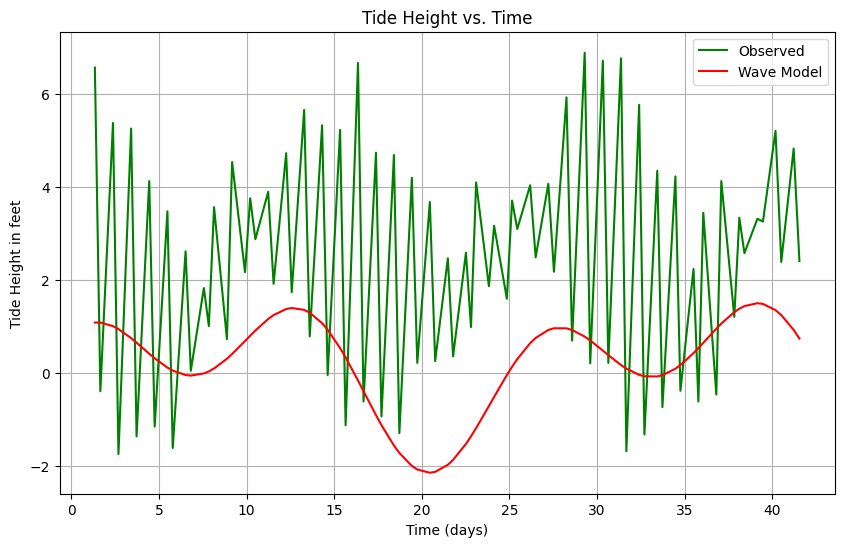

In [4]:
#part 2
data = np.array(parse_tidal_data(file_path))
time = data[:, 0]
height = data[:,1]

#p0 is the inputs to the tidal function , with 0.25 experimental error
params, covariance = curve_fit(tidal_function, time, height, p0=[5, 2*np.pi/12.1, 2*np.pi/25, 0, np.pi/3, 4], sigma=np.full_like(time, 0.25))


plt.figure(figsize=(10, 6))
plt.plot(time, height, label='Observed', color='green')
plt.plot(time, tidal_function(time, *params), label='Wave Model', color='red')

plt.xlabel('Time (days)')

plt.ylabel('Tide Height in feet')

plt.title('Tide Height vs. Time')

plt.legend()
plt.grid(True)


plt.savefig('tide_model_fit.pdf')

plt.show()

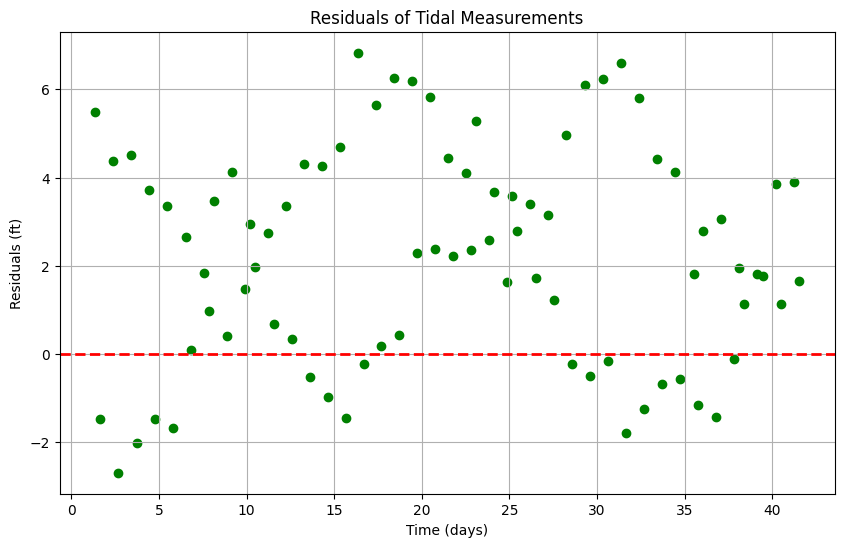

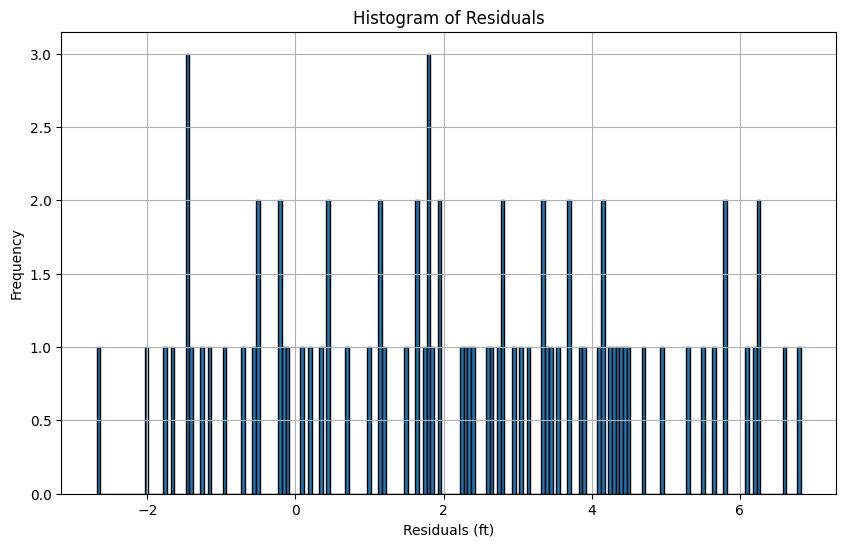

In [5]:
#part 3
model_predictions = tidal_function(time, *params)


residuals = height - model_predictions


plt.figure(figsize=(10, 6))
plt.scatter(time, residuals, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Residuals (ft)')
plt.title('Residuals of Tidal Measurements')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
bin_width = 0.05  
bins = int(np.ptp(residuals) / bin_width)
plt.hist(residuals, bins=bins, edgecolor='black')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.savefig('residuals_histogram.pdf')
plt.show()

